In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2


import flotilla
study = flotilla.embark('singlecell_pnm_figure6_splicing_correlation_track_examples', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2017-01-03 09:08:20	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure6_splicing_correlation_track_examples/datapackage.json
2017-01-03 09:08:20	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-03 09:08:50 	Initializing Study
2017-01-03 09:08:50 	Initializing Predictor configuration manager for Study
2017-01-03 09:08:50	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-03 09:08:50	Added ExtraTreesClassifier to default predictors
2017-01-03 09:08:50	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-03 09:08:50	Added ExtraTreesRegressor to default predictors
2017-01-03 09:08:50	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-03 09:08:50	Added Gradie

Error loading species hg19 data: HTTP Error 404: Not Found

In [2]:
folder = 'figures'

In [3]:
figure_folder = 'figures/015_bimodal_correlations_scatterplots'
! mkdir -p $figure_folder

In [4]:
splicing_expression_corr_tidy = study.supplemental.splicing_expression_corr
splicing_expression_corr_tidy = splicing_expression_corr_tidy.loc[splicing_expression_corr_tidy['Pearson R'].abs() > 0.5]
splicing_expression_corr_tidy = splicing_expression_corr_tidy.join(study.expression.feature_data['gene_name'], on='Expression Gene')
splicing_expression_corr_tidy['Correlation Direction'] = splicing_expression_corr_tidy['Pearson R'].map(
    lambda x: '(+) Positive' if x > 0 else '(-) Negative')
print(splicing_expression_corr_tidy.shape)
splicing_expression_corr_tidy.head()

(3011, 8)


,Splicing Gene,phenotype,Expression Gene,Pearson R,event_id,modality,gene_name,Correlation Direction
66,BRD8-event1,NPC,ENSG00000005436,-0.538949,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GCFC2,(-) Negative
176,BRD8-event1,NPC,ENSG00000010310,-0.519802,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GIPR,(-) Negative
483,BRD8-event1,NPC,ENSG00000050438,-0.509080,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SLC4A8,(-) Negative
875,BRD8-event1,NPC,ENSG00000073060,-0.602362,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SCARB1,(-) Negative
1277,BRD8-event1,NPC,ENSG00000088682,-0.588166,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,COQ9,(-) Negative


In [5]:
splicing_events = (('BRD8-event1', 'exon:chr5:137495758-137495862:- exon:chr5:137495244-137495288:- exon:chr5:137492571-137492956:-'),
                   ('BRD8-event2', 'exon:chr5:137500009-137500102:- exon:chr5:137499776-137499822:- exon:chr5:137498819-137499033:-'),
                   ("DYNC1I2", 'exon:chr2:172563743-172563887:+ exon:chr2:172569277-172569336:+ exon:chr2:172571838-172571878:+'),
                   ('EIF5', 'exon:chr14:103800339-103800597:+ exon:chr14:103800726-103800934:+ exon:chr14:103801990-103802269:+'),
                   ('EIF6', 'exon:chr20:33871979-33872295:- exon:chr20:33868457-33868632:- exon:chr20:33867745-33867921:-'),
                   ("MDM4", 'exon:chr1:204501319-204501374:+ exon:chr1:204506558-204506625:+ exon:chr1:204507337-204507436:+'),
                   ("MEAF6", 'exon:chr1:37967405-37967597:- exon:chr1:37962308-37962337:- exon:chr1:37961475-37961519:-'),
                   ("RPN2", 'exon:chr20:35864983-35865112:+ exon:chr20:35866805-35866852:+ exon:chr20:35869706-35869820:+'),
                   ('SUGT1', 'exon:chr13:53233314-53233384:+ exon:chr13:53235610-53235705:+ exon:chr13:53236784-53236837:+'),
                   ('PKM', 'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-'),
                   ('SNAP25', 'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'),
                   ('SMARCE1', 'exon:chr17:38801828-38801871:- exon:chr17:38798707-38798811:- exon:chr17:38793744-38793824:-'))

splicing_events = list(((x, '@'.join(y.split())) for x, y in splicing_events))
splicing_events

[('BRD8-event1',
  'exon:chr5:137495758-137495862:-@exon:chr5:137495244-137495288:-@exon:chr5:137492571-137492956:-'),
 ('BRD8-event2',
  'exon:chr5:137500009-137500102:-@exon:chr5:137499776-137499822:-@exon:chr5:137498819-137499033:-'),
 ('DYNC1I2',
  'exon:chr2:172563743-172563887:+@exon:chr2:172569277-172569336:+@exon:chr2:172571838-172571878:+'),
 ('EIF5',
  'exon:chr14:103800339-103800597:+@exon:chr14:103800726-103800934:+@exon:chr14:103801990-103802269:+'),
 ('EIF6',
  'exon:chr20:33871979-33872295:-@exon:chr20:33868457-33868632:-@exon:chr20:33867745-33867921:-'),
 ('MDM4',
  'exon:chr1:204501319-204501374:+@exon:chr1:204506558-204506625:+@exon:chr1:204507337-204507436:+'),
 ('MEAF6',
  'exon:chr1:37967405-37967597:-@exon:chr1:37962308-37962337:-@exon:chr1:37961475-37961519:-'),
 ('RPN2',
  'exon:chr20:35864983-35865112:+@exon:chr20:35866805-35866852:+@exon:chr20:35869706-35869820:+'),
 ('SUGT1',
  'exon:chr13:53233314-53233384:+@exon:chr13:53235610-53235705:+@exon:chr13:53236784

## Interesting genes to correlate

In [30]:
genes_to_plot = {'SNAP25': {'Psi~1': ('EPHB2', 'KATNAL1', "ANAPC16", 'AMD1'),
                            'Psi~0': ('SYNGR3', "DCTN1", "PCLO", 'PVRL1', 'COPA', 'ATP6V1G2', 'VPS13D')},
                 'DYNC1I2': {'Psi~1': ('ONECUT2', 'DCC', "NFASC", "INA", 'KIF5A', 'STMN2', 'ELAVL2', 'ELAVL3', 
                                       'ELAVL4', "SRRM4"),
                             'Psi~0': ('ANLN', 'NSL1', 'SMC1A', 'CBX5', 'ORC3', 'MKI67', 'RPS16', 'RPS15', 'RPL35', 
                                       'RPL41', 'EIF5B')},
                 'PKM': {'Psi~0': ("CENPN", 'CENPF', 'CCNB1', 'KIF23', 'ETV5', 'PDGFC', 'NOTCH3', 'HES1', 'BMPR1B', 
                                   'TGFB2', 'LIN28B', 'ID3'),
                         'Psi~1': ('GRIA1', 'MAP2', 'MAP1B', 'GAP43', 'STMN1', 'STMN2', 'ELAVL2', 'ONECUT2', 'SOX11')},
                 'SUGT1': {'Psi~0': ('ZEB1', 'MMP16', 'TSPAN14'),
                           'Psi~1': ('ERC2', 'TBC1D1', 'ELOVL4', "EOGT", 'FAM60A')}}

In [10]:
single_metadata = study.metadata.data.query('single == True')

outlier_colors = pd.Series(['lightgrey' if x else 'black' for x in single_metadata['outlier']], 
                           index=single_metadata.index)
outlier_colors[:5]

CVN_01    black
CVN_02    black
CVN_03    black
CVN_04    black
CVN_05    black
dtype: object

In [11]:
single_expression = study.expression.singles
print(single_expression.shape)
single_expression.head()

(206, 18594)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0.0,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0.0,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0.0,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0.0,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0.0,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [12]:
gene_filter = (single_expression > 1).sum() >= 30
gene_filter.sum()

14314

In [13]:
single_expression = single_expression.loc[:, gene_filter]
print(single_expression.shape)
single_expression.head()

(206, 14314)


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000178605,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,7.703080,...,3.29961,1.774580,0.080647,0.291587,1.017003,6.998972,0.153573,0.119524,0.000000,2.905205
CVN_02,5.338678,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,6.666089,...,0.00000,4.323377,0.495262,0.000000,0.568696,0.000000,0.000000,0.116144,0.087565,3.746504
CVN_03,0.146438,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,0.000000,...,0.00000,0.225987,0.000000,0.000000,0.330164,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,5.373481,...,0.00000,1.646223,0.562974,0.000000,0.223287,0.195424,0.000000,1.601383,0.205765,1.533982
CVN_05,7.531459,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,8.701198,...,0.00000,0.900241,0.353069,0.000000,0.646603,6.631383,0.000000,0.096939,0.133075,0.553417


In [14]:
splicing_to_correlate = pd.DataFrame(dict((gene, study.splicing.singles[event_id].dropna()) 
                                          for gene, event_id in splicing_events))
print(splicing_to_correlate.shape)
splicing_to_correlate.head()

(196, 12)


,BRD8-event1,BRD8-event2,DYNC1I2,EIF5,EIF6,MDM4,MEAF6,PKM,RPN2,SMARCE1,SNAP25,SUGT1
CVN_01,NaN,NaN,NaN,1.0,NaN,1.000000,0.0,0.000000,0.350598,1.0,NaN,0.250000
CVN_02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,0.000000,1.0,NaN,0.000000
CVN_03,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,1.0,NaN,0.000000,0.0,0.000000,0.213058,NaN,NaN,0.000000
CVN_05,NaN,NaN,NaN,1.0,0.0,0.692308,0.0,0.348754,0.000000,1.0,NaN,0.292383


## Plot SNAP25 vs PKM splicing

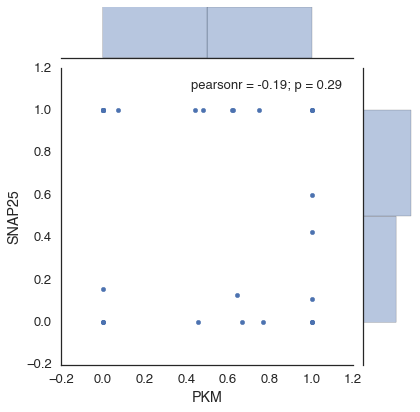

In [16]:
sns.jointplot('PKM', 'SNAP25', splicing_to_correlate)

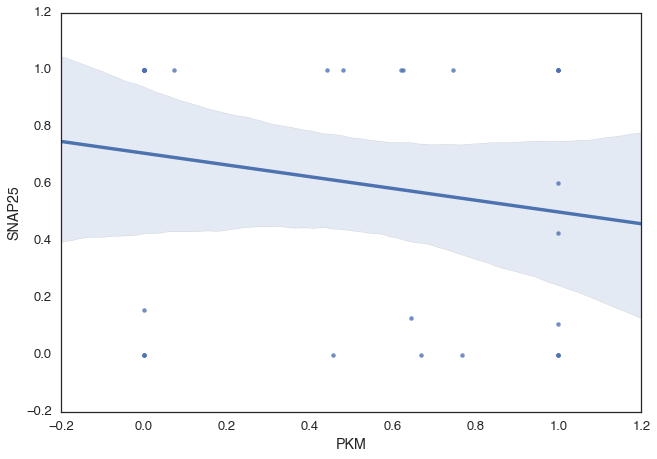

In [19]:
sns.regplot('PKM', 'SNAP25', splicing_to_correlate)

In [26]:
splicing_to_correlate['phenotype'] = study.sample_id_to_phenotype
splicing_to_correlate.head()

,BRD8-event1,BRD8-event2,DYNC1I2,EIF5,EIF6,MDM4,MEAF6,PKM,RPN2,SMARCE1,SNAP25,SUGT1,hue,phenotype
CVN_01,NaN,NaN,NaN,1.0,NaN,1.000000,0.0,0.000000,0.350598,1.0,NaN,0.250000,NPC,NPC
CVN_02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,0.000000,1.0,NaN,0.000000,NPC,NPC
CVN_03,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN,NPC,NPC
CVN_04,NaN,NaN,NaN,1.0,NaN,0.000000,0.0,0.000000,0.213058,NaN,NaN,0.000000,NPC,NPC
CVN_05,NaN,NaN,NaN,1.0,0.0,0.692308,0.0,0.348754,0.000000,1.0,NaN,0.292383,NPC,NPC


In [28]:
# g = sns.FacetGrid(splicing_to_correlate, hue='phenotype')
# g.map(sns.regplot, 'PKM', 'SNAP25')

## Plot splicing vs interesting genes

In [31]:
genes_to_plot

{'DYNC1I2': {'Psi~0': ('ANLN',
   'NSL1',
   'SMC1A',
   'CBX5',
   'ORC3',
   'MKI67',
   'RPS16',
   'RPS15',
   'RPL35',
   'RPL41',
   'EIF5B'),
  'Psi~1': ('ONECUT2',
   'DCC',
   'NFASC',
   'INA',
   'KIF5A',
   'STMN2',
   'ELAVL2',
   'ELAVL3',
   'ELAVL4',
   'SRRM4')},
 'PKM': {'Psi~0': ('CENPN',
   'CENPF',
   'CCNB1',
   'KIF23',
   'ETV5',
   'PDGFC',
   'NOTCH3',
   'HES1',
   'BMPR1B',
   'TGFB2',
   'LIN28B',
   'ID3'),
  'Psi~1': ('GRIA1',
   'MAP2',
   'MAP1B',
   'GAP43',
   'STMN1',
   'STMN2',
   'ELAVL2',
   'ONECUT2',
   'SOX11')},
 'SNAP25': {'Psi~0': ('SYNGR3',
   'DCTN1',
   'PCLO',
   'PVRL1',
   'COPA',
   'ATP6V1G2',
   'VPS13D'),
  'Psi~1': ('EPHB2', 'KATNAL1', 'ANAPC16', 'AMD1')},
 'SUGT1': {'Psi~0': ('ZEB1', 'MMP16', 'TSPAN14'),
  'Psi~1': ('ERC2', 'TBC1D1', 'ELOVL4', 'EOGT', 'FAM60A')}}

In [34]:
dfs = []

for spliced_gene, interesting_genes in genes_to_plot.items():
    psi = splicing_to_correlate[spliced_gene]
    psi.name = 'psi'
    for psi_value, gene_names in interesting_genes.items():
        for gene_name in gene_names:
            gene_id = study.expression.maybe_renamed_to_feature_id(gene_name)[0]
            gene_expression = single_expression[gene_id]
            gene_expression.name = 'log2(TPM+1)'
            df = gene_expression.to_frame()
            df['expression_gene'] = gene_name
            df['spliced_gene'] = spliced_gene
            df = df.join(psi)
            df = df.join(study.sample_id_to_phenotype)
            df = df.dropna()
            df = df.reset_index()
            dfs.append(df)
tidy_interesting_genes = pd.concat(dfs)
print(tidy_interesting_genes.shape)
tidy_interesting_genes.head()

(7235, 6)


,index,log2(TPM+1),expression_gene,spliced_gene,psi,phenotype
0,CVN_06,4.377385,EPHB2,SNAP25,1.0,NPC
1,CVN_11,3.327558,EPHB2,SNAP25,0.0,NPC
2,CVN_13,7.580196,EPHB2,SNAP25,1.0,NPC
3,CVN_19,2.195116,EPHB2,SNAP25,1.0,NPC
4,CVN_20,0.000000,EPHB2,SNAP25,1.0,NPC


In [55]:
sns.set(context='paper', style='whitegrid')

In [62]:
spliced_gene_phenotypes = {'SNAP25': ('MN'), 'PKM': ('MN'), 'DYNC1I2': ('iPSC', 'NPC'), 'SUGT1': ('iPSC')}

ylims = {"SNAP25": (0, 10), 'PKM': (0, 15), 'DYNC1I2': (0, 15), 'SUGT1': (0, 10)}

In [65]:
sns.regplot?

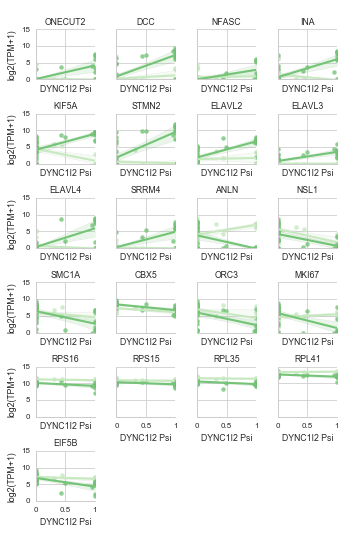

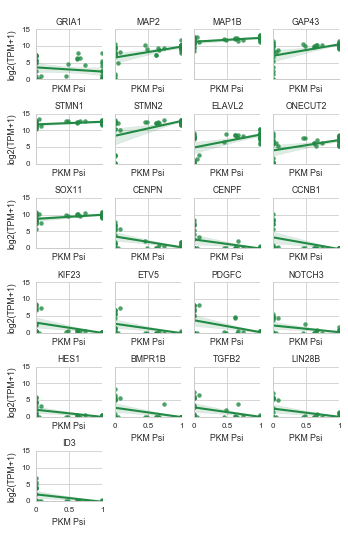

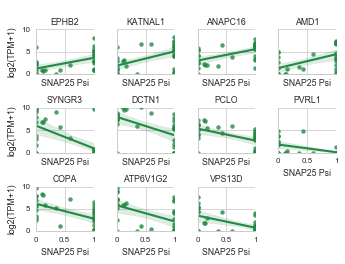

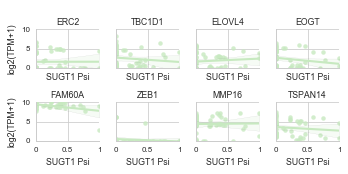

In [64]:
for spliced_gene, df in tidy_interesting_genes.groupby('spliced_gene'):
    phenotypes = spliced_gene_phenotypes[spliced_gene]
    ylim = ylims[spliced_gene]
    yticks = (ylim[0], ylim[-1]/2, ylim[-1])
    
    data = df.query('phenotype in @phenotypes')
    
    g = sns.FacetGrid(data, col='expression_gene', col_wrap=4, size=1.25,
                      hue='phenotype', hue_order=study.phenotype_order, palette=study.phenotype_to_color)
    g.set(xticks=[0, 0.5, 1], ylim=ylim, xlim=(0, 1))
    g.set_xticklabels([0, 0.5, 1])
#     g.set_yticklabels(yticks)
    g.map(sns.regplot, 'psi', 'log2(TPM+1)', truncate=True)
    g.set(xlabel='{} Psi'.format(spliced_gene))
    g.set_titles('\n{col_name}')
    for ax in g.axes.flat:
        ax.locator_params(nbins=4, axis='y')
    g.fig.tight_layout(w_pad=0.01, h_pad=0.05)
    g.savefig('{folder}/{spliced_gene}_expression_correlation_regplot.pdf'.format(
            folder=figure_folder, spliced_gene=spliced_gene))